# 합성곱신경망(CNN) 컬러이미지 다중분류
- cifar10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### 1.데이터 준비

In [ ]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 16s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

y_train.shape, y_test.shape

((50000,), (10000,))

In [ ]:
y_train[:20]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6],
      dtype=uint8)

In [ ]:
class_names = ['airplane','automobile','bird',
               'cat','deer','dog','frog','horse','ship','truck']

In [ ]:
samples = np.random.randint(len(y_train), size=16)
samples

array([40875, 42482, 13227, 25499, 13930, 24718, 40077, 25107, 18728,
        2583, 48897,  8340, 32182, 16022, 45828, 44822])

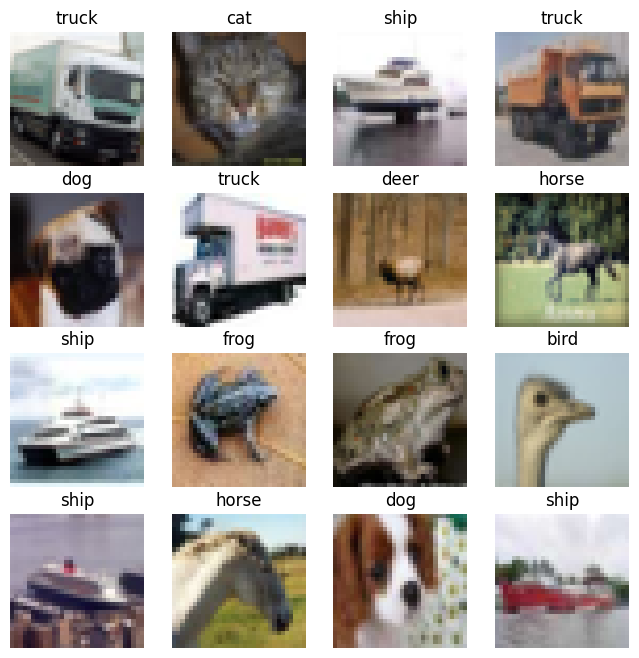

In [ ]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(4, 4, 1+i)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_names[y_train[idx]])
plt.show()

#### 검증용 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000,), (10000,))

#### 정규화

In [ ]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

In [ ]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 2.모델 만들기

In [ ]:
X_train_s.shape

(40000, 32, 32, 3)

In [ ]:
16*9*3 + 16

448

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

### 3.모델학습

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32

histroy = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    verbose=1
)

Epoch 1/10
1250/1250 [==============================] - 10s 4ms/step - loss: 1.5594 - accuracy: 0.4392 - val_loss: 1.3464 - val_accuracy: 0.5300
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2123 - accuracy: 0.5703 - val_loss: 1.1849 - val_accuracy: 0.5800
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0868 - accuracy: 0.6220 - val_loss: 1.1057 - val_accuracy: 0.6121
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0118 - accuracy: 0.6439 - val_loss: 1.0474 - val_accuracy: 0.6394
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9556 - accuracy: 0.6669 - val_loss: 1.0367 - val_accuracy: 0.6431
Epoch 6/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.9058 - accuracy: 0.6854 - val_loss: 1.0031 - val_accuracy: 0.6509
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8665 - accuracy: 0.6974 - val_loss: 0.9788 - val_accuracy

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

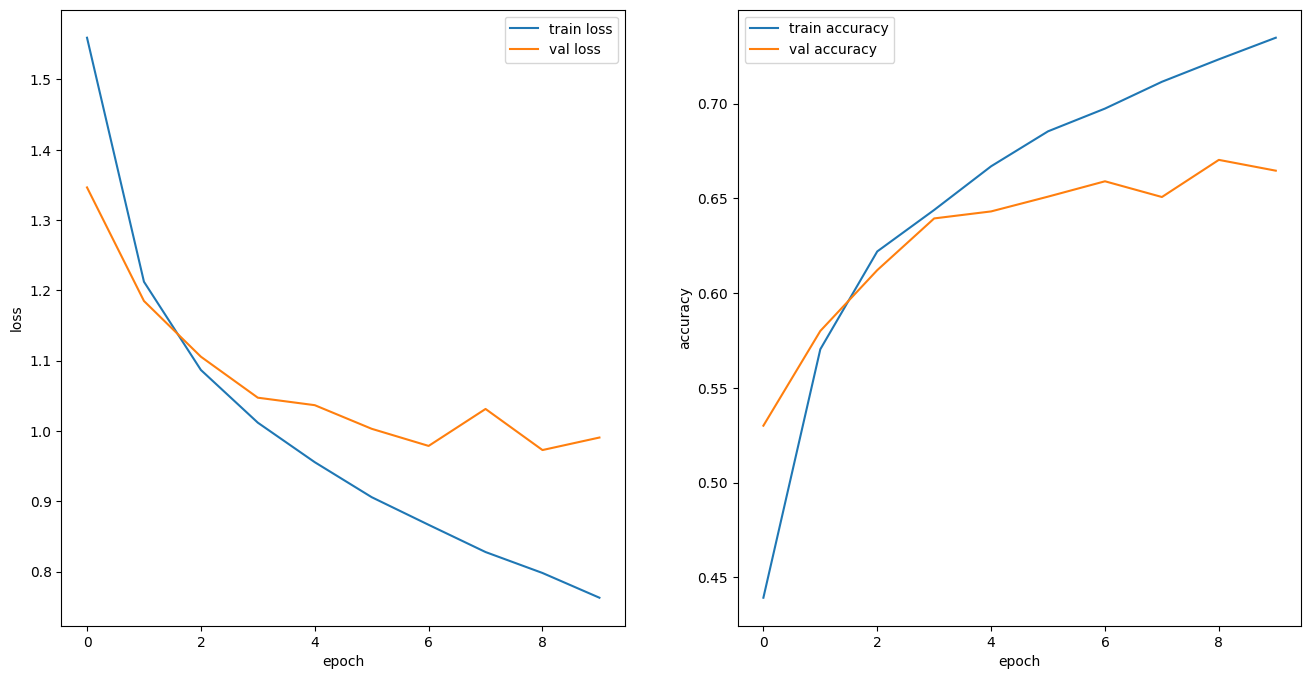

In [ ]:
plot_history(histroy)

In [ ]:
X_test_s = X_test.astype('float32')/255.
y_test_o = to_categorical(y_test)

In [ ]:
model.evaluate(X_test_s, y_test_o)

313/313 [==============================] - 1s 4ms/step - loss: 0.9891 - accuracy: 0.6666


[0.9890965819358826, 0.6665999889373779]

### 4.DropOut Layer 추가

In [ ]:
def create_model_01():
    model = keras.Sequential([
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 10
BATCH_SIZE = 32

histroy = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    verbose=1
)

Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 1.7400 - accuracy: 0.3586 - val_loss: 1.4335 - val_accuracy: 0.4946
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4772 - accuracy: 0.4651 - val_loss: 1.3438 - val_accuracy: 0.5401
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3988 - accuracy: 0.4954 - val_loss: 1.2354 - val_accuracy: 0.5824
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3416 - accuracy: 0.5192 - val_loss: 1.1777 - val_accuracy: 0.5872
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3073 - accuracy: 0.5333 - val_loss: 1.1591 - val_accuracy: 0.5949
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2747 - accuracy: 0.5444 - val_loss: 1.1176 - val_accuracy: 0.6128
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2530 - accuracy: 0.5562 - val_loss: 1.0831 - val_accuracy:

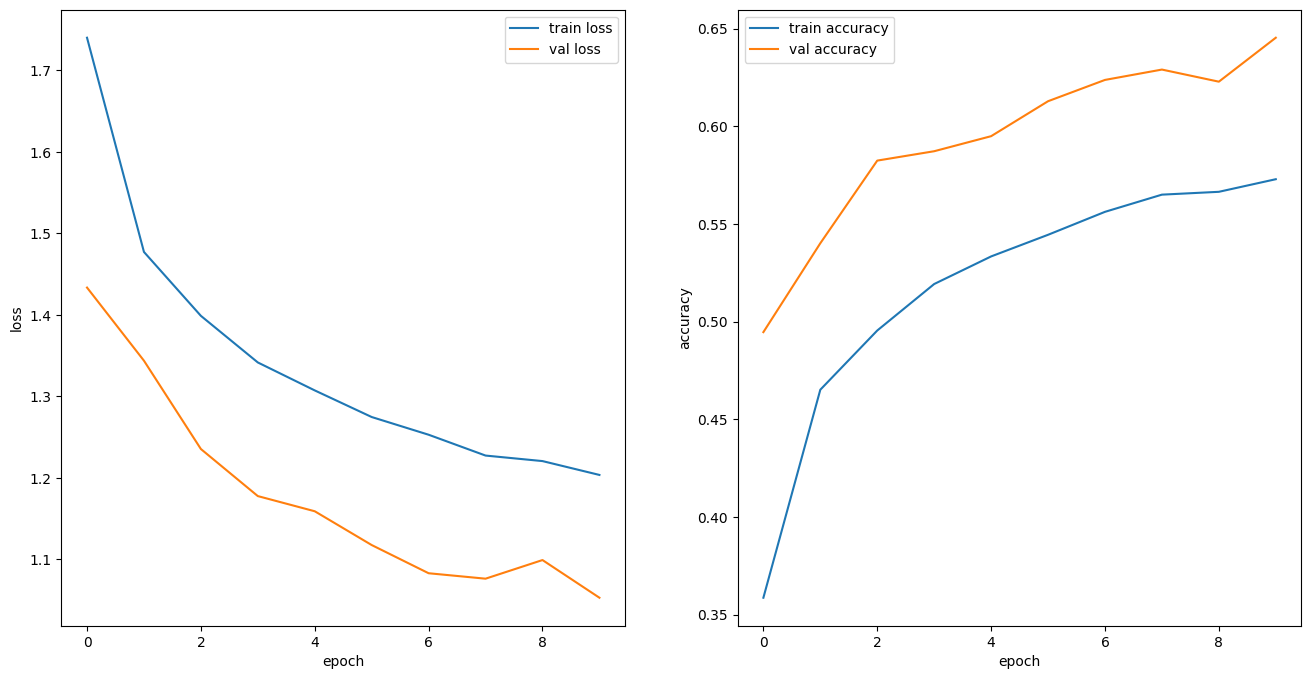

In [ ]:
plot_history(histroy)

In [ ]:
model.evaluate(X_test_s, y_test_o)

313/313 [==============================] - 2s 5ms/step - loss: 1.0598 - accuracy: 0.6465


[1.0598264932632446, 0.6464999914169312]

### 5.콜백
- EarlyStopping
- ModelCheckpoint
- ReduceLROnPlateau

In [ ]:
from keras import callbacks

ckpt_path = './ckpt/cifar10.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_weights_only=True,
    save_best_only=True,
    verbose=1
)

In [ ]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 20
BATCH_SIZE = 32

histroy = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    callbacks=[ckpt_callback],
    verbose=1
)

Epoch 1/20
1250/1250 [==============================] - ETA: 0s - loss: 1.7820 - accuracy: 0.3415
Epoch 1: val_loss improved from inf to 1.45896, saving model to ./ckpt/cifar10.ckpt
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7820 - accuracy: 0.3415 - val_loss: 1.4590 - val_accuracy: 0.4760
Epoch 2/20
1245/1250 [============================>.] - ETA: 0s - loss: 1.5045 - accuracy: 0.4537
Epoch 2: val_loss improved from 1.45896 to 1.35191, saving model to ./ckpt/cifar10.ckpt
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5047 - accuracy: 0.4535 - val_loss: 1.3519 - val_accuracy: 0.5238
Epoch 3/20
1244/1250 [============================>.] - ETA: 0s - loss: 1.4152 - accuracy: 0.4881
Epoch 3: val_loss improved from 1.35191 to 1.24574, saving model to ./ckpt/cifar10.ckpt
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4153 - accuracy: 0.4881 - val_loss: 1.2457 - val_accuracy: 0.5724
Epoch 4/20
1237/1250 [=========================

In [ ]:
# 저장되어있는 최선의 가중치를 모델에 업로드한다.

model.load_weights(ckpt_path)

In [ ]:
model.evaluate(X_test_s, y_test_o)

313/313 [==============================] - 1s 3ms/step - loss: 0.9819 - accuracy: 0.6636


[0.981886625289917, 0.6636000275611877]

#### EarlyStopping

In [ ]:
es_callback = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

In [ ]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 20
BATCH_SIZE = 32

#
histroy = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    callbacks=[ ckpt_callback, es_callback],
    verbose=1
)

Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 1.7908 - accuracy: 0.3421 - val_loss: 1.4682 - val_accuracy: 0.4811
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5392 - accuracy: 0.4414 - val_loss: 1.3778 - val_accuracy: 0.5273
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4460 - accuracy: 0.4804 - val_loss: 1.3602 - val_accuracy: 0.5338
Epoch 4/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3918 - accuracy: 0.4997 - val_loss: 1.2771 - val_accuracy: 0.5614
Epoch 5/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3601 - accuracy: 0.5145 - val_loss: 1.1869 - val_accuracy: 0.5851
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3312 - accuracy: 0.5258 - val_loss: 1.1836 - val_accuracy: 0.5981
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3057 - accuracy: 0.5354 - val_loss: 1.1886 - val_accuracy:

#### ReduceLROnPlateau

In [ ]:
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    factor=0.2,
    min_lr=0.0001,
    verbose=1
)

In [ ]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 20
BATCH_SIZE = 32

#
histroy = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    callbacks=[ ckpt_callback, es_callback, reduce_lr],
    verbose=1
)

Epoch 1/20
1247/1250 [============================>.] - ETA: 0s - loss: 1.7438 - accuracy: 0.3581
Epoch 1: val_loss did not improve from 0.97457
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7435 - accuracy: 0.3584 - val_loss: 1.4633 - val_accuracy: 0.4863 - lr: 0.0010
Epoch 2/20
1240/1250 [============================>.] - ETA: 0s - loss: 1.5019 - accuracy: 0.4560
Epoch 2: val_loss did not improve from 0.97457
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5010 - accuracy: 0.4562 - val_loss: 1.3338 - val_accuracy: 0.5291 - lr: 0.0010
Epoch 3/20
1242/1250 [============================>.] - ETA: 0s - loss: 1.4215 - accuracy: 0.4874
Epoch 3: val_loss did not improve from 0.97457
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4217 - accuracy: 0.4872 - val_loss: 1.2709 - val_accuracy: 0.5524 - lr: 0.0010
Epoch 4/20
1237/1250 [============================>.] - ETA: 0s - loss: 1.3627 - accuracy: 0.5107
Epoch 4: val_loss did not imp

In [ ]:
def create_model_02():
    model = keras.Sequential([
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
model = create_model_02()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 20
BATCH_SIZE = 32

#
histroy = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    callbacks=[ ckpt_callback, es_callback, reduce_lr],
    verbose=1
)

Epoch 1/20
1248/1250 [============================>.] - ETA: 0s - loss: 2.0538 - accuracy: 0.1958
Epoch 1: val_loss did not improve from 0.97457
1250/1250 [==============================] - 10s 6ms/step - loss: 2.0537 - accuracy: 0.1959 - val_loss: 1.8291 - val_accuracy: 0.2907 - lr: 0.0010
Epoch 2/20
1250/1250 [==============================] - ETA: 0s - loss: 1.8598 - accuracy: 0.2789
Epoch 2: val_loss did not improve from 0.97457
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8598 - accuracy: 0.2789 - val_loss: 1.6917 - val_accuracy: 0.3586 - lr: 0.0010
Epoch 3/20
1249/1250 [============================>.] - ETA: 0s - loss: 1.7580 - accuracy: 0.3269
Epoch 3: val_loss did not improve from 0.97457
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7581 - accuracy: 0.3268 - val_loss: 1.5832 - val_accuracy: 0.4311 - lr: 0.0010
Epoch 4/20
1244/1250 [============================>.] - ETA: 0s - loss: 1.6984 - accuracy: 0.3543
Epoch 4: val_loss did not im

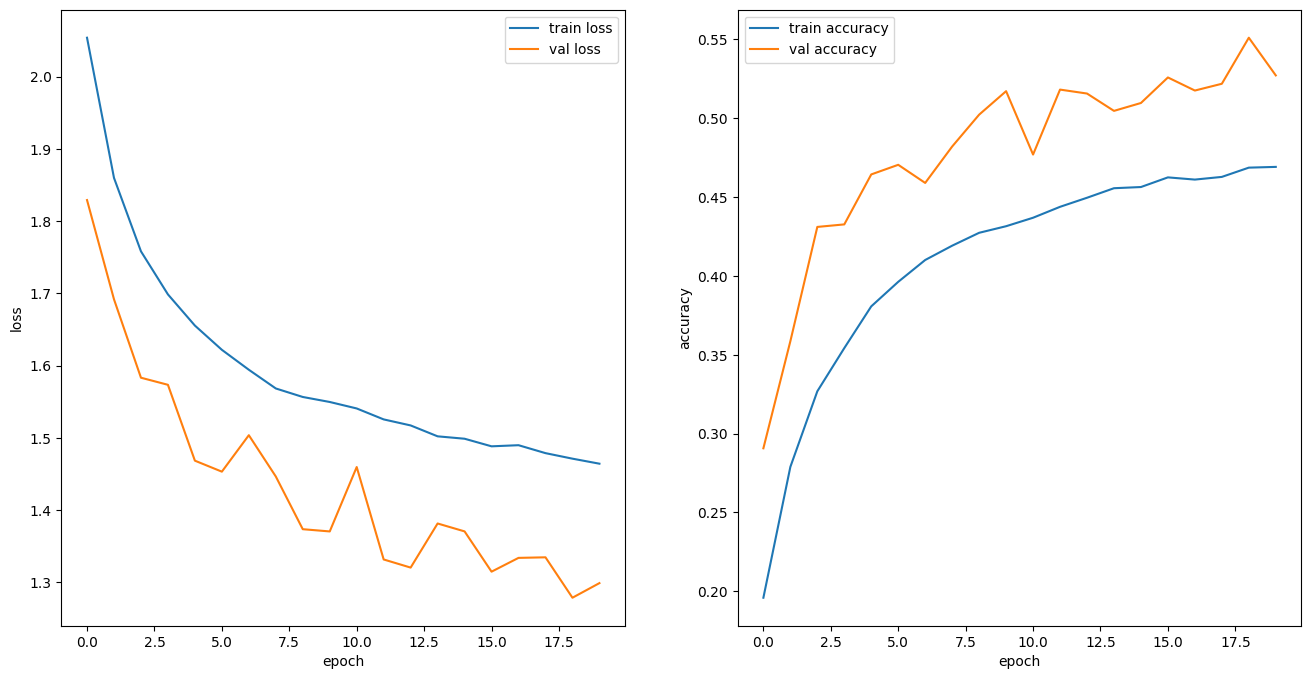

In [ ]:
plot_history(histroy)

### END